# Calculate correlation. Extract coefficients of best fit

# Calculate correlation correlation among variables

In [1]:
# import libraries
import numpy
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# location of file
#dir_common = 'result-'

In [3]:
# name of variables to be considered
var_name_list = ['TN', 'TP', 'Oxygen', 'P_Prod', 'Chl_a_sum', 'salt', 'Dust', 'FineSed']
#var_name_list

In [4]:
# site names
sites_name = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H']

## Extract data of variables

In [6]:
# Form DataFrame of average values of variables, for both regional and sites average
vars_region_avg = dict()
vars_sites_avg = dict()

for var_name in var_name_list:

    # data file location and name
    dir_loc = 'result-'+var_name+'/'
    file_name = dir_loc + 'raw-data-'+var_name+'-monthly'+'.csv'

    # read data from file
    df_raw_data = pd.read_csv(file_name)

    # obtain average values of variables
    vars_region_avg[var_name] = df_raw_data['GBR_avg']
    vars_sites_avg[var_name] = df_raw_data[sites_name].mean(axis=1)

In [7]:
#vars_region_avg

In [8]:
#vars_sites_avg

## Correlation for regional average values

In [9]:
# convert to DataFrame
df_vars_region_avg = pd.DataFrame(vars_region_avg)
#df_vars_region_avg

In [10]:
# calculate correlation
corr_vars_region_avg = df_vars_region_avg.corr()
corr_vars_region_avg

# save calculated correlation to file
corr_vars_region_avg.to_csv('corr-region-avg.csv')

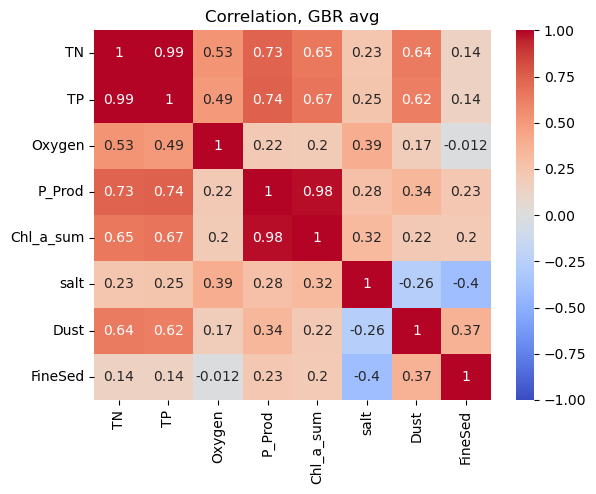

In [11]:
# Plot heatmap of correlation
sns.heatmap(corr_vars_region_avg, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation, GBR avg')

# save figure
plt.savefig('corr-region-avg.png', bbox_inches='tight')

## Correlation for average values across sites

In [12]:
# convert to data frame
df_vars_sites_avg = pd.DataFrame(vars_sites_avg)
#df_vars_sites_avg

In [13]:
# Calculate correlation
corr_vars_sites_avg = df_vars_sites_avg.corr()
corr_vars_sites_avg

# Save calculated coefficient to file 
corr_vars_sites_avg.to_csv('corr-sites-avg.csv')

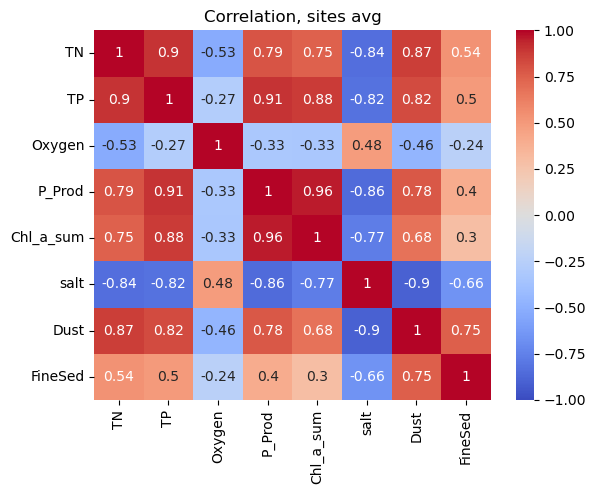

In [14]:
# Plot heatmap of correlation
sns.heatmap(corr_vars_sites_avg, annot=True, vmin=-1, vmax=1, cmap='coolwarm')
plt.title('Correlation, sites avg')

# Save heatmap of correlation to file
plt.savefig('corr-sites-avg.png', bbox_inches='tight')

In [2]:
#help(pd.DataFrame.corr)

In [1]:
#help(pd.DataFrame.mean)

# Extract best-fit coefficients. Check p-value

Load coefficients of line of best fit of variables at different sites. Also check if the corresponding value is larger than a specified level (alpha)

In [0]:
# Define a function that returns the gradient if p value is smaller than alpha
def determine_change(m, p_value, alpha=0.05):

    if p_value < alpha:
        #if m>0: return '+'
        #else: return '-'
        return format(m, '+.2e')
    else:
        return ''

In [0]:
# Load data 

# list of variables
var_name_list = ['TN', 'TP', 'Oxygen', 'P_Prod', 'Chl_a_sum', 'salt', 'Dust', 'FineSed']

# list of sites
sites_name = ['GBR_avg', 'A','B','C','D','E','F','G','H']

# significance level for accepting there is a change
alpha = 0.05

# Initialize storage
fit_coeffs = pd.DataFrame(index=sites_name)
changes = pd.DataFrame(index=sites_name)

# Iterate over stored data file and retrieve fit results
for var_name in var_name_list:

    # retrieve results
    dir_loc = 'result-'+var_name+'/'
    fit_result = pd.read_csv(dir_loc+'fit-result-'+var_name+'.csv', index_col='site')
    fit_coeffs[var_name] = fit_result['m']

    # accept graduents when p-value is below alpha
    changes[var_name] = fit_result.apply(lambda col: determine_change(col['m'], col['p_value'], alpha), axis=1)

In [0]:
#changes

In [0]:
#fit-coeff

In [0]:
# save data to a file
changes.to_csv('changes.csv')
fit_coeffs.to_csv('fit_coeffs.csv')